Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.6361101429069362
ANN Training Accuracy: 0.78863583546363
ANN Test Accuracy: 0.6084001394214011
ANN (Config 2) Training Accuracy: 0.7150244015802928
ANN (Config 2) Test Accuracy: 0.6104914604391775
KNN Training Accuracy: 0.5239367882872414
KNN Test Accuracy: 0.4597420704078076


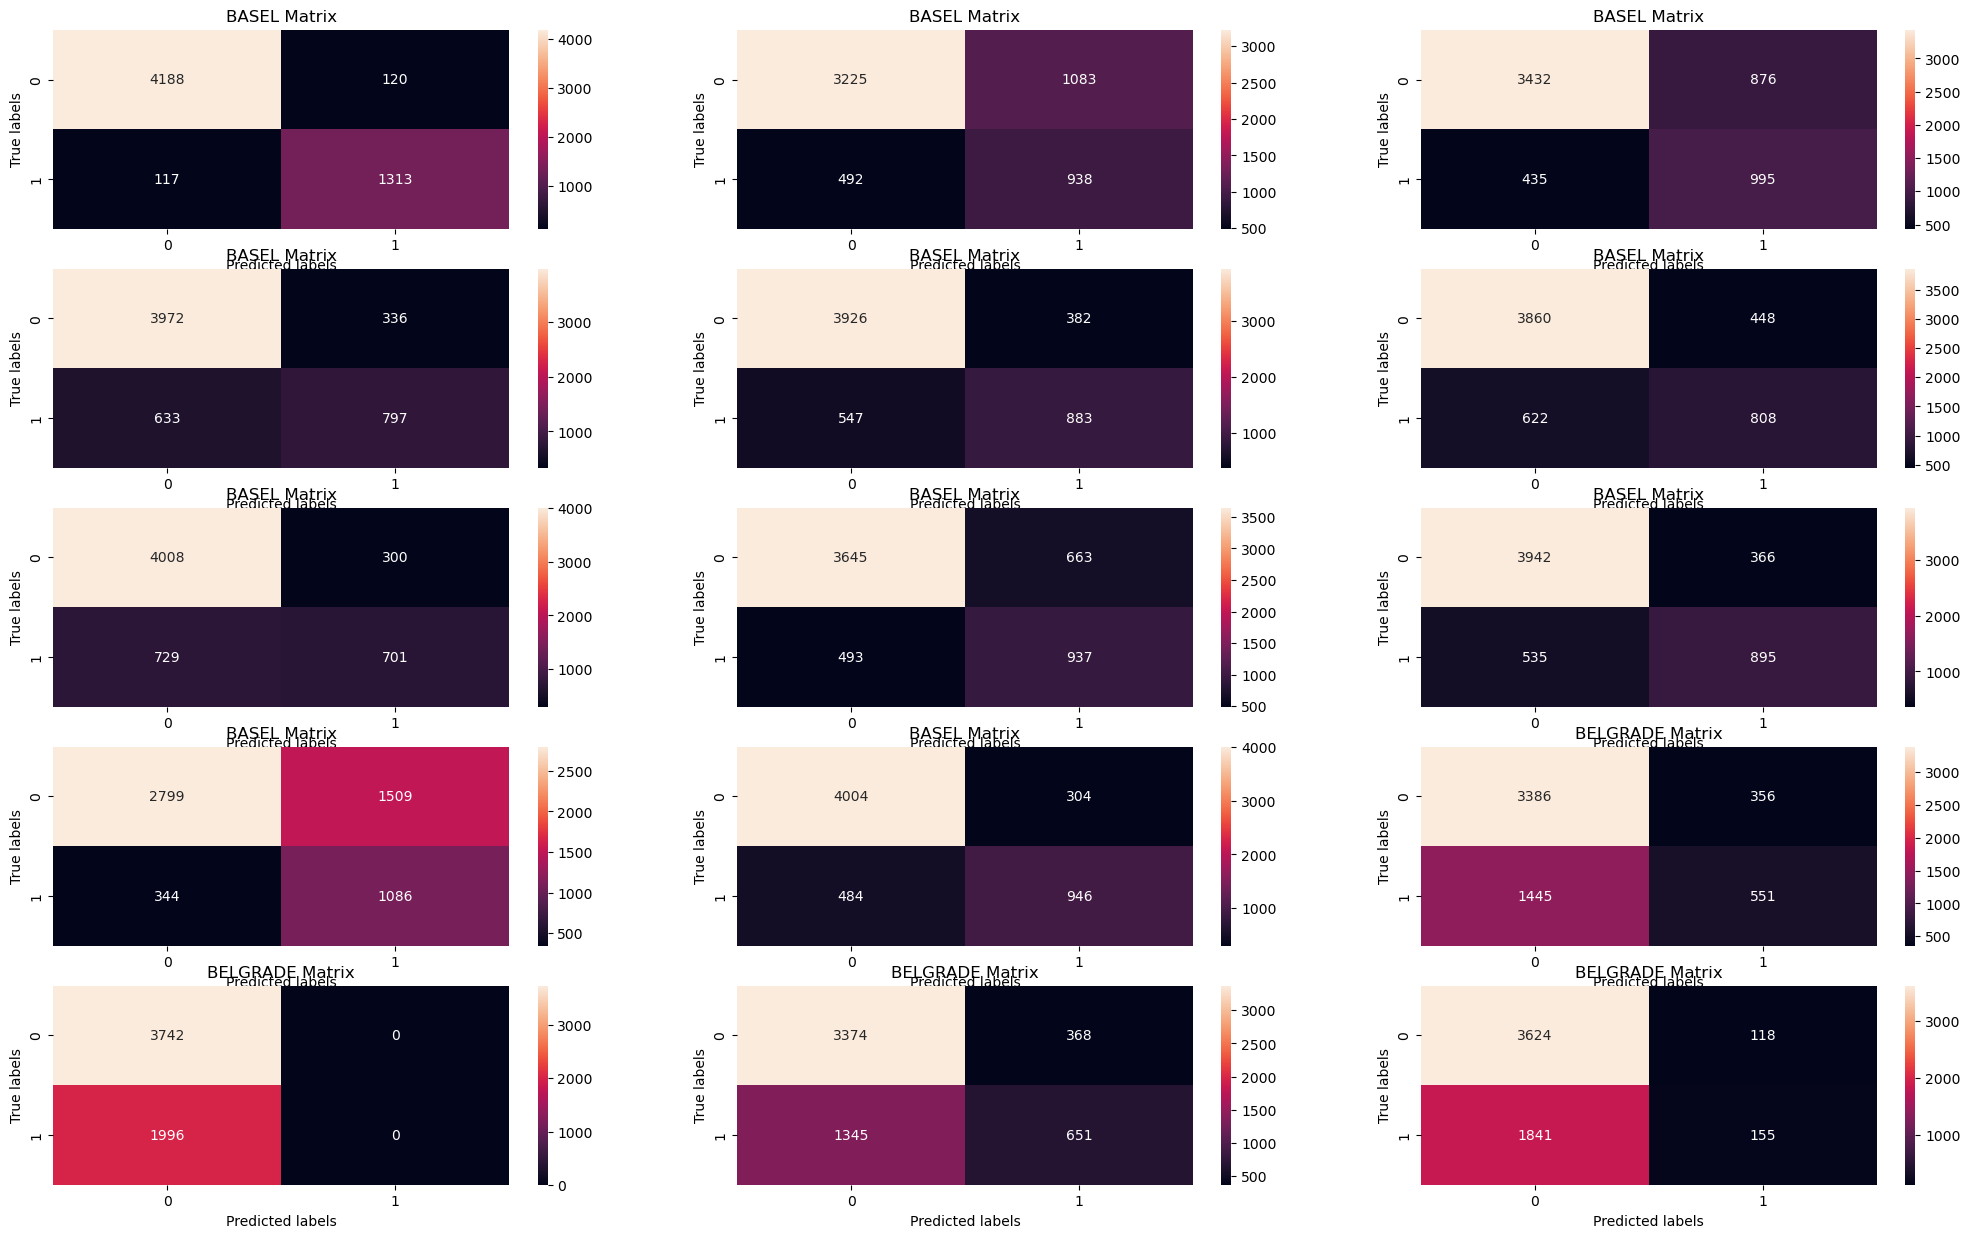

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#Load Data
path = '/Users/andrewfearney27/Downloads/'
weather_data = pd.read_csv(path + 'Dataset-weather-prediction-dataset-scaled.csv')
pleasantdf = pd.read_csv(path + 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

#Dropping unrelated station data from main dataset
X = weather_data.drop(['DATE', 'MONTH'], axis=1)
y = pleasantdf.drop(['DATE'], axis=1)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

#Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

train_accuracy_tree = accuracy_score(y_train, y_pred_train_tree)
test_accuracy_tree = accuracy_score(y_test, y_pred_test_tree)

print(f"Decision Tree Training Accuracy: {train_accuracy_tree}")
print(f"Decision Tree Test Accuracy: {test_accuracy_tree}")

#ANN Model (New Configuration)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=3000, tol=1e-10, random_state=42)
mlp.fit(X_train, y_train)

y_pred_train_ann = mlp.predict(X_train)
y_pred_test_ann = mlp.predict(X_test)

train_accuracy_ann = accuracy_score(y_train, y_pred_train_ann)
test_accuracy_ann = accuracy_score(y_test, y_pred_test_ann)

print(f"ANN Training Accuracy: {train_accuracy_ann}")
print(f"ANN Test Accuracy: {test_accuracy_ann}")

#ANN Model Configuration 2 (New)
mlp_new = MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=3000, tol=1e-11, random_state=42)
mlp_new.fit(X_train, y_train)
y_pred_train_ann_new = mlp_new.predict(X_train)
y_pred_test_ann_new = mlp_new.predict(X_test)

train_accuracy_ann_new = accuracy_score(y_train, y_pred_train_ann_new)
test_accuracy_ann_new = accuracy_score(y_test, y_pred_test_ann_new)

print(f"ANN (Config 2) Training Accuracy: {train_accuracy_ann_new}")
print(f"ANN (Config 2) Test Accuracy: {test_accuracy_ann_new}")


#KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

print(f"KNN Training Accuracy: {train_accuracy_knn}")
print(f"KNN Test Accuracy: {test_accuracy_knn}")

#Multi-station Confusion Matrix for Decision Tree
locations = list(x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"])
key = "_pleasant_weather"
figure, ax = plt.subplots(5, 3, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

for i in range(5):
    for j in range(3):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test_tree[:, count])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        count += 1

plt.show()

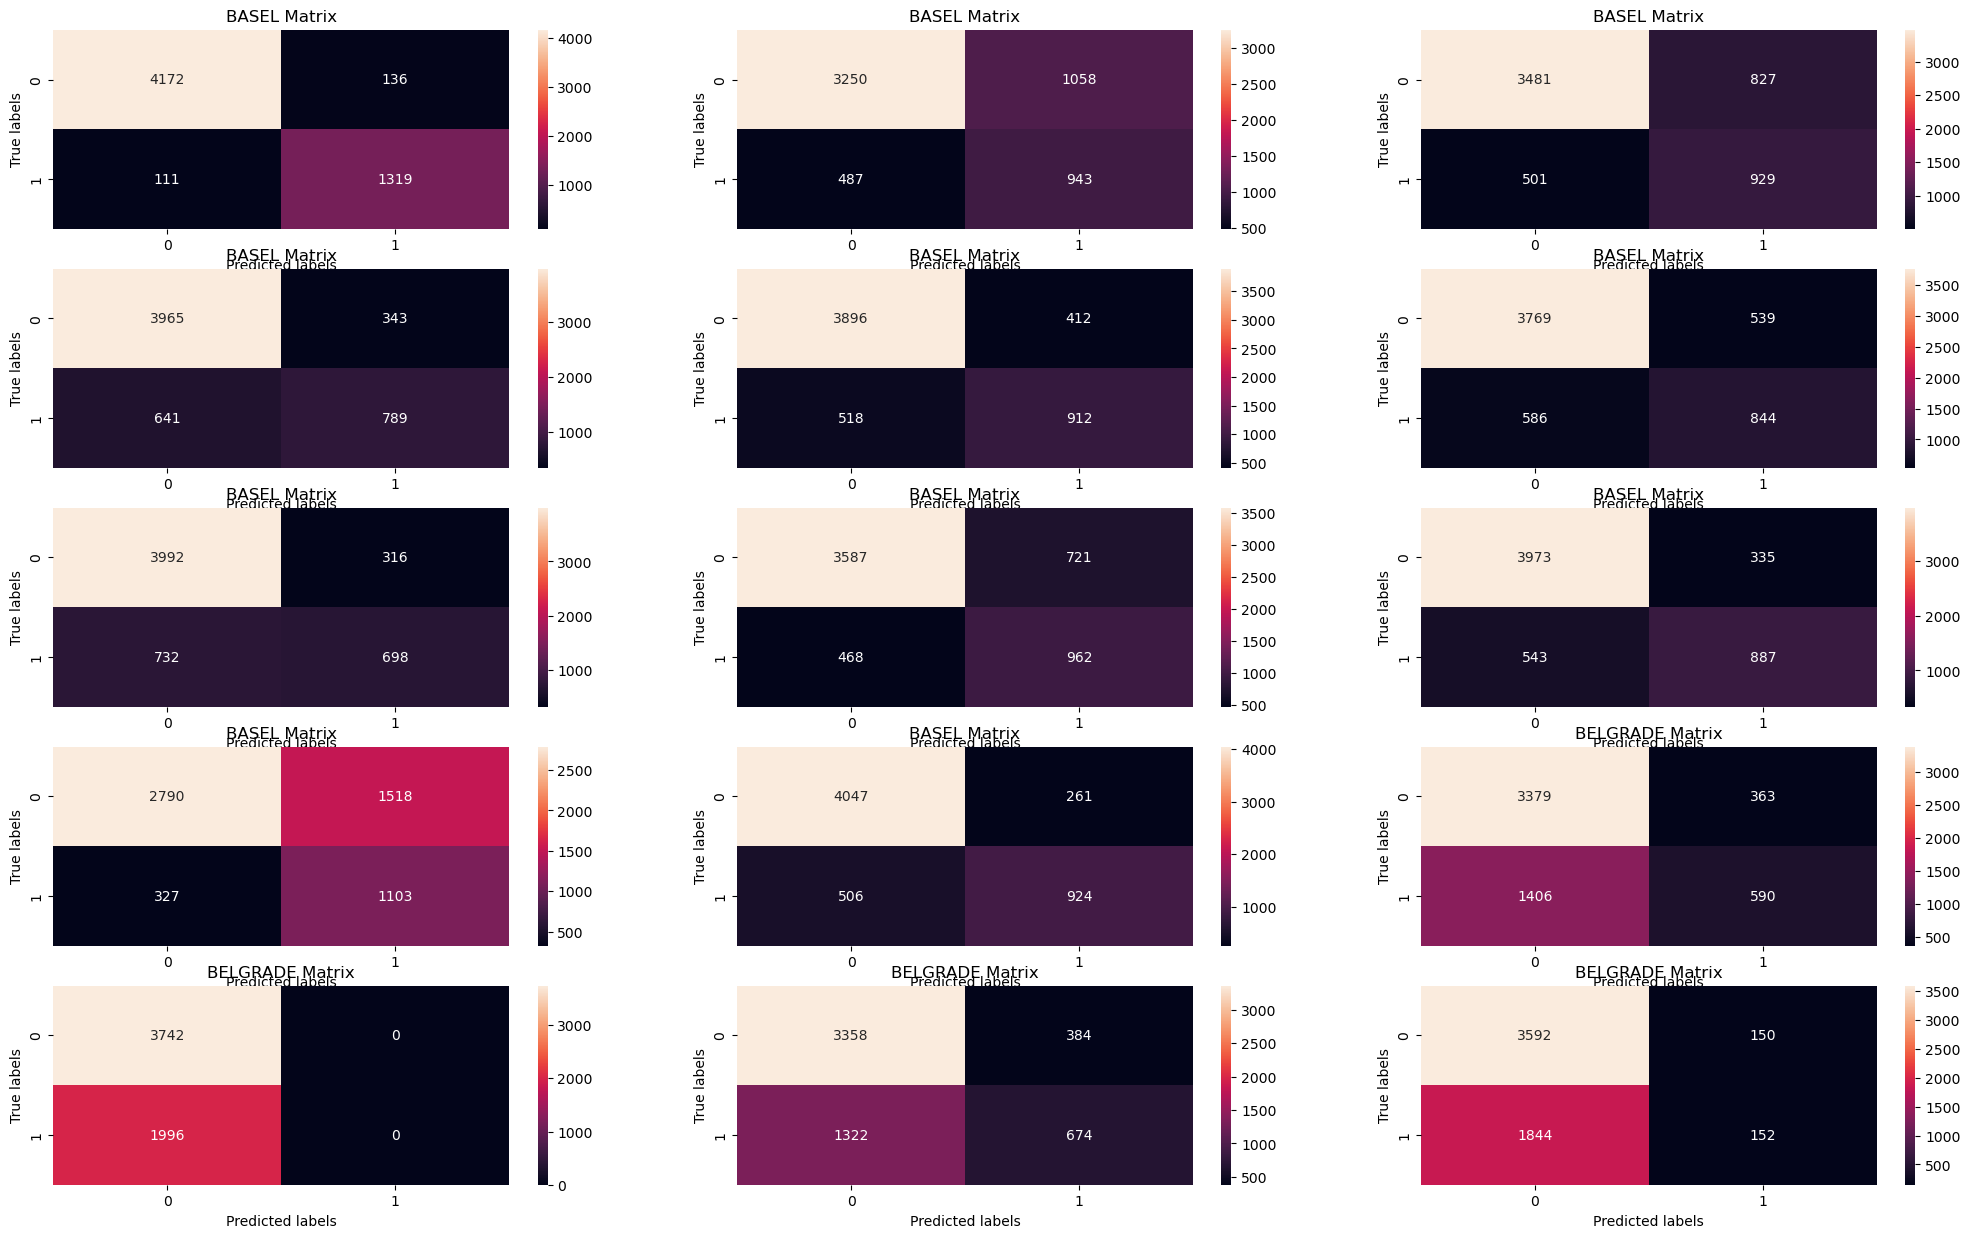

In [25]:
#Multi-station Confusion Matrix for ANN
figure, ax = plt.subplots(5, 3, figsize=(25, 15))
count = 0

for i in range(5):
    for j in range(3):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test_ann[:, count])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        count += 1

plt.show()

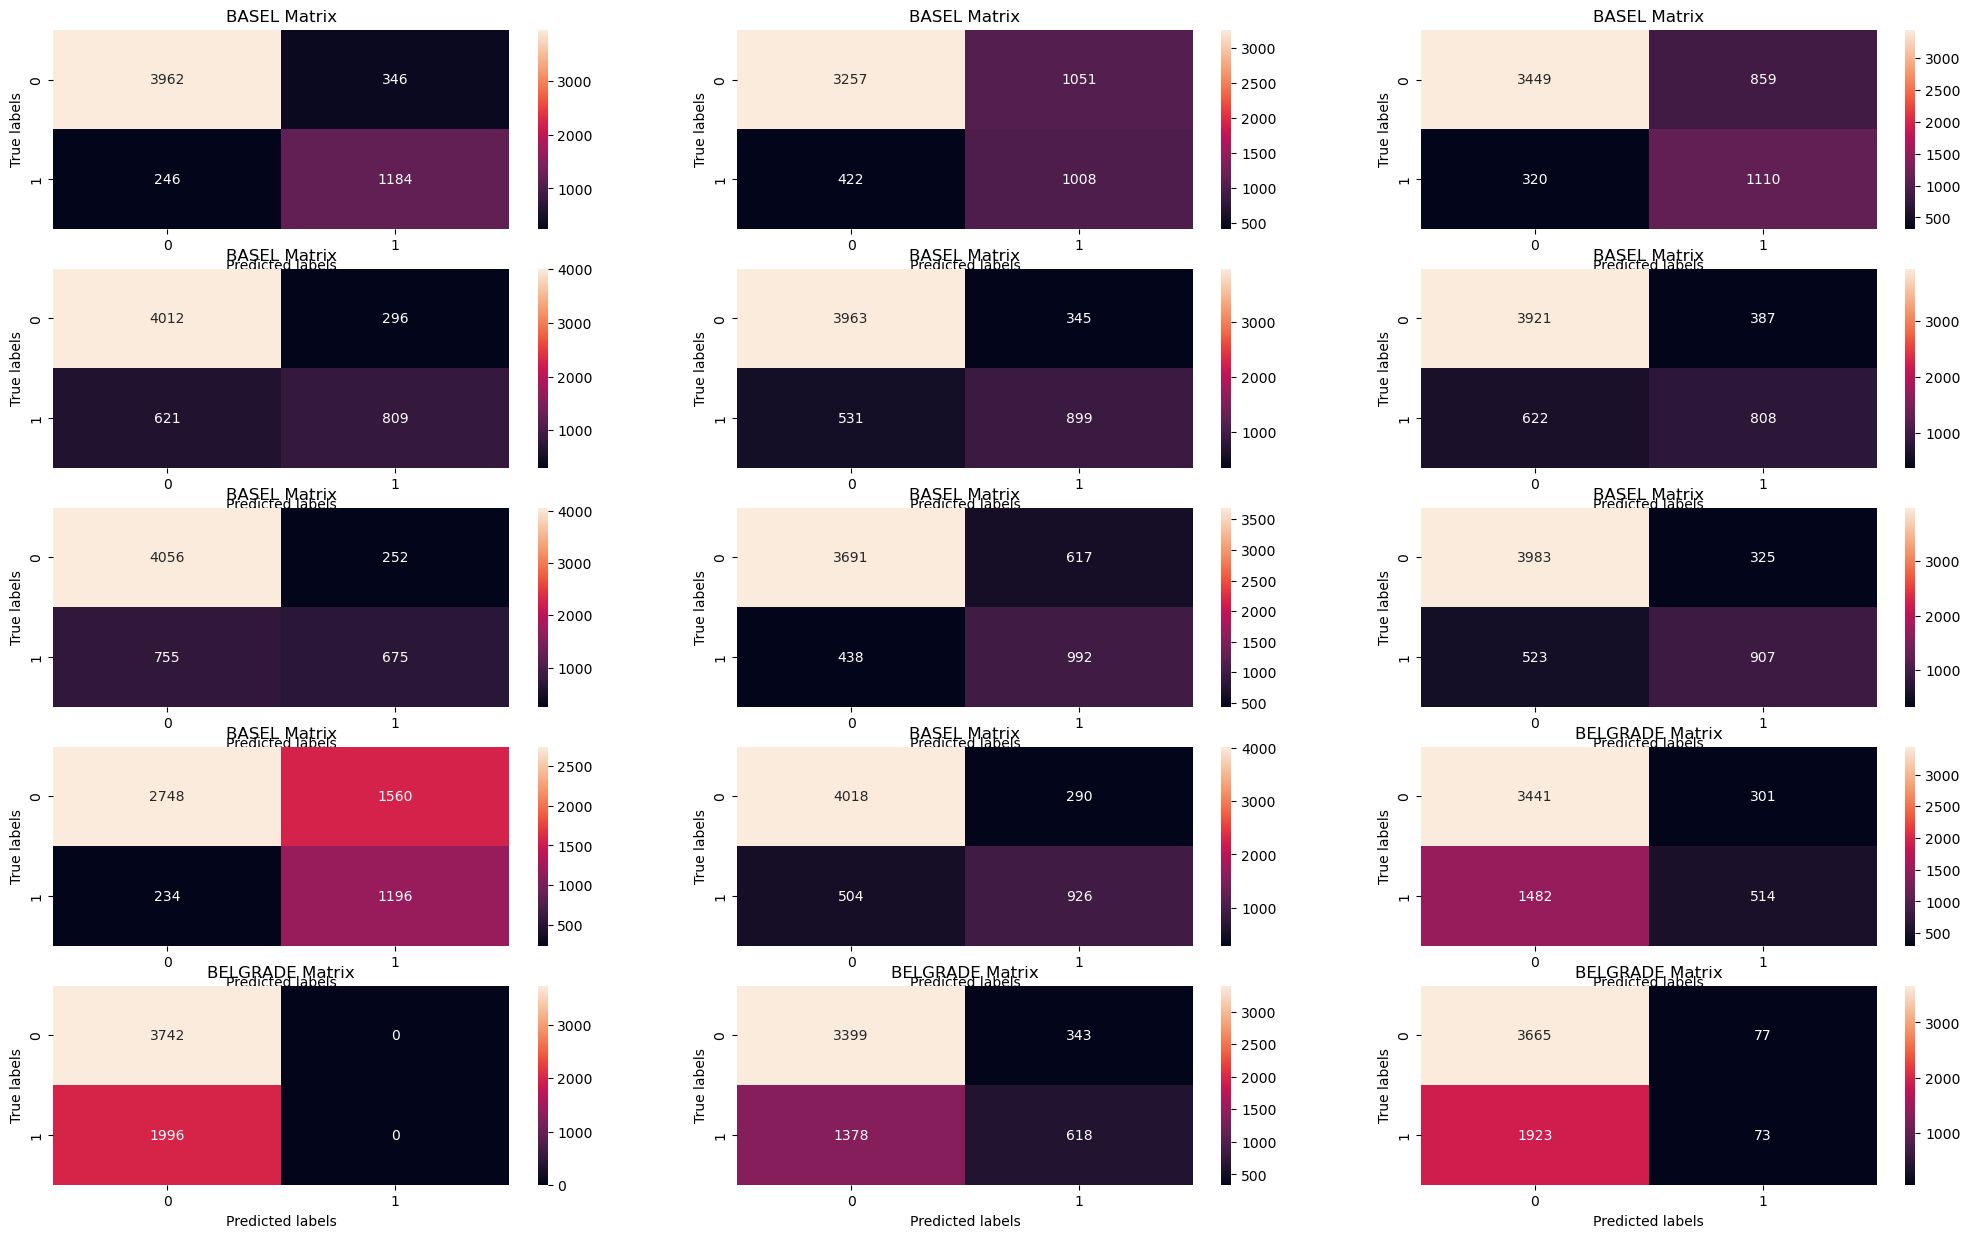

In [26]:
#Multi-station Confusion Matrix for KNN
figure, ax = plt.subplots(5, 3, figsize=(25, 15))
count = 0

for i in range(5):
    for j in range(3):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test_knn[:, count])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        count += 1

plt.show()